# Flight Price Prediction

 Project Title     :-  Flight Fare Prediction          
 Technologies  :-  Machine Learning Algorithm              
 Domain           :-  Aviation              

## Problem Statement:


    
       Travelling through flights has become an integral part of today’s lifestyle as more and more people are opting for faster travelling options. The flight ticket prices increase or decrease every now and then depending on various factors like timing of the flights, destination, and duration of flights various occasions such as vacations or festive season. Therefore, having some basic idea of the flight fares before planning the trip will surely help many people save money and time. The main goal is to predict the fares of the flights based on different factors available in the provided dataset.

## Approach:

    The classical machine learning tasks like Data Exploration,  Data Cleaning,Feature Engineering, Model Building and Model Testing. Try out different machine learning algorithms that’s best fit for the above case.

In [118]:
# Import the neccessary liabaries to use the dataset:

import pandas as pd
import numpy as np
import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode
pd.set_option("display.max_columns",None)

In [119]:
# importing the dataset:

data=pd.read_excel(r"C:\Users\Asus\Desktop\Flight\Data_Train (1).xlsx")
data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [120]:
data.info()
print("-"*100)
print()
print("Name of the Columns are:- ",data.columns)
print("-"*100)
print()
print("The no. of record present in the dataset are: ",data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
----------------------------------------------------------------------------------------------------

Name of the Columns are:-  Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total

In [121]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Observation:
 
     From the above observation we get to know that there are no Nan value present in the dataset. Except in the Columne     name "Route" and in the "Total_stop" with a very less number.

What to do now:
   
      I will try to take a variable with "feature_with_nan" and put the Nan value in it and after that i 
      will find the percentage of Nan value in to its specifics columns. So, that we can uderstand what to do 
      with the Nan Value.
      

In [122]:
feature_with_nan=[feature for feature in data.columns if data[feature].isnull().sum()]
feature_with_nan

['Route', 'Total_Stops']

In [123]:
for feature in feature_with_nan:
    print(feature,np.round(data[feature].isnull().mean(),4), "% missing value")

Route 0.0001 % missing value
Total_Stops 0.0001 % missing value


observation:

       we get to know that there is a very less percentage of Nan value present
       in the missing columns.
       Route has only 0.0001% of missing value. and
       Total_stops has also only 0.0001% of missing value.

What to do now:

        as there are very less number of missing value or i can say that only 1 records of 
        two coulmns have missing value. So i am replacing the missing value with median but without 
        doing any type of visulaziation.

In [124]:
data.fillna(data[feature].isnull().median(),inplace=True)

In [125]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Handling Temporal Variable

###  1. Date of Journey to (Day and Month of journey)

In [126]:
# Extracting Date from the Date of Journey:
data["Day_of_Journey"]=pd.to_datetime(data["Date_of_Journey"],format="%d/%m/%Y").dt.day

# Extracting Month from the Date of journey:
data["Month_of_Journey"]=pd.to_datetime(data["Date_of_Journey"],format="%d/%m/%Y").dt.month

In [127]:
# since we have converted Date of journey columns into integer so we can drop the columns Date of Journey as it is of no use:
data.drop(["Date_of_Journey"],axis=1,inplace=True)

### 2. Dep_Time to (Hours and minute of Dep)

In [128]:
# Extracting the Hours and min from the Dep_Time

# Hours
data["Dep_hours"]=pd.to_datetime(data["Dep_Time"]).dt.hour

# minute
data["Dep_minute"]=pd.to_datetime(data["Dep_Time"]).dt.minute

# now there is a no use of the columns "Dep_Time" so we will drop it
data.drop(["Dep_Time"],axis=1,inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_16532\3276285513.py:4: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\Asus\AppData\Local\Temp\ipykernel_16532\3276285513.py:7: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



### 3. Arrival_Timing to (Arrival_hours and Arrival_minute)

In [129]:
# Extracting the Arrival Hours and Minute from the Arrival Timming

# Arrival hours:
data["Arrival_hour"]=pd.to_datetime(data["Arrival_Time"]).dt.hour

# Arrival minute:
data["Arrival_minute"]=pd.to_datetime(data["Arrival_Time"]).dt.minute

#now there is a no use of the columns "Arrival_Time" so we will drop it:
data.drop(["Arrival_Time"],axis=1,inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_16532\233482724.py:4: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\Asus\AppData\Local\Temp\ipykernel_16532\233482724.py:7: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



### 4. Duration to (Duration_hour and Duration_minutes)

In [130]:
# Time taken by plane to reach destination is called duration
# it is the difference between Departure time and Arrival time

# convert the duration columns into list because we have to split it--
duration =list(data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i]:
            duration[i] = '0h {}'.format(duration[i].strip())
            
duration_hours=[]
duration_minutes=[]

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split()[0][:-1]))
    duration_minutes.append(int(duration[i].split()[1][:-1]))
    
data["Duration_hours"]=duration_hours
data["Duratin_minutes"]=duration_minutes


# now i will drop the "Duration" columns as it has of now use:--
data.drop(['Duration'],axis=1,inplace=True)

Observation of Temporal Variable:

        1)  In Date of journey i have split it into a Day and Month of Journey and drop the "Date of Journey" columns.
        2)  In Dep_Time i have split it into hours and mintues so we can easliy determine the time spend.
        3)  In Arrival Time we can uderstand easily by Arrival_hours and arrival_minute.
        4)  Duration is the difference between Departure time and Arrival time

In [131]:
# Thus the new data will look like--

data.head(3)

Airline    Source Destination                  Route Total_Stops  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   

  Additional_Info  Price  Day_of_Journey  Month_of_Journey  Dep_hours  \
0         No info   3897              24                 3         22   
1         No info   7662               1                 5          5   
2         No info  13882               9                 6          9   

   Dep_minute  Arrival_hour  Arrival_minute  Duration_hours  Duratin_minutes  
0          20             1              10               2               50  
1          50            13              15               7               25  
2          25             4              25              19                0

# Handling Categorical Feature:

Type of Categorical feature are:--

       1. Nominal data --> data are not in any order --> OneHotEncoder is used in this case
       2. Ordinal data --> data are in order --> LabelEncoder is used in this case

In [133]:
categorical_feature=[feature for feature in data.columns if data[feature].dtype == "O"]
categorical_feature

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

     Nominal Categorical data are:
           1. Airline
           2. Source
           3. Destination
           
     Ordinal Categorical data are:
           1. Total_step

In [134]:
# import liabaries for data visulazation and EDA:

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import cufflinks as cf
cf.go_offline()

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

## 1. Airline

In [135]:
data["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [136]:
data["Airline"].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

observation:
       
         from the above observation we can see that Jet Airways had been most of the time.

In [137]:

data.iplot(kind='bar',x="Airline",y='Price',xTitle="Airlines name",yTitle="Price of the Airlines",title="Airlines Vs Price")

observation:

       Jet Airways has the maxmimun price.

TypeError: countplot() got multiple values for argument 'data'

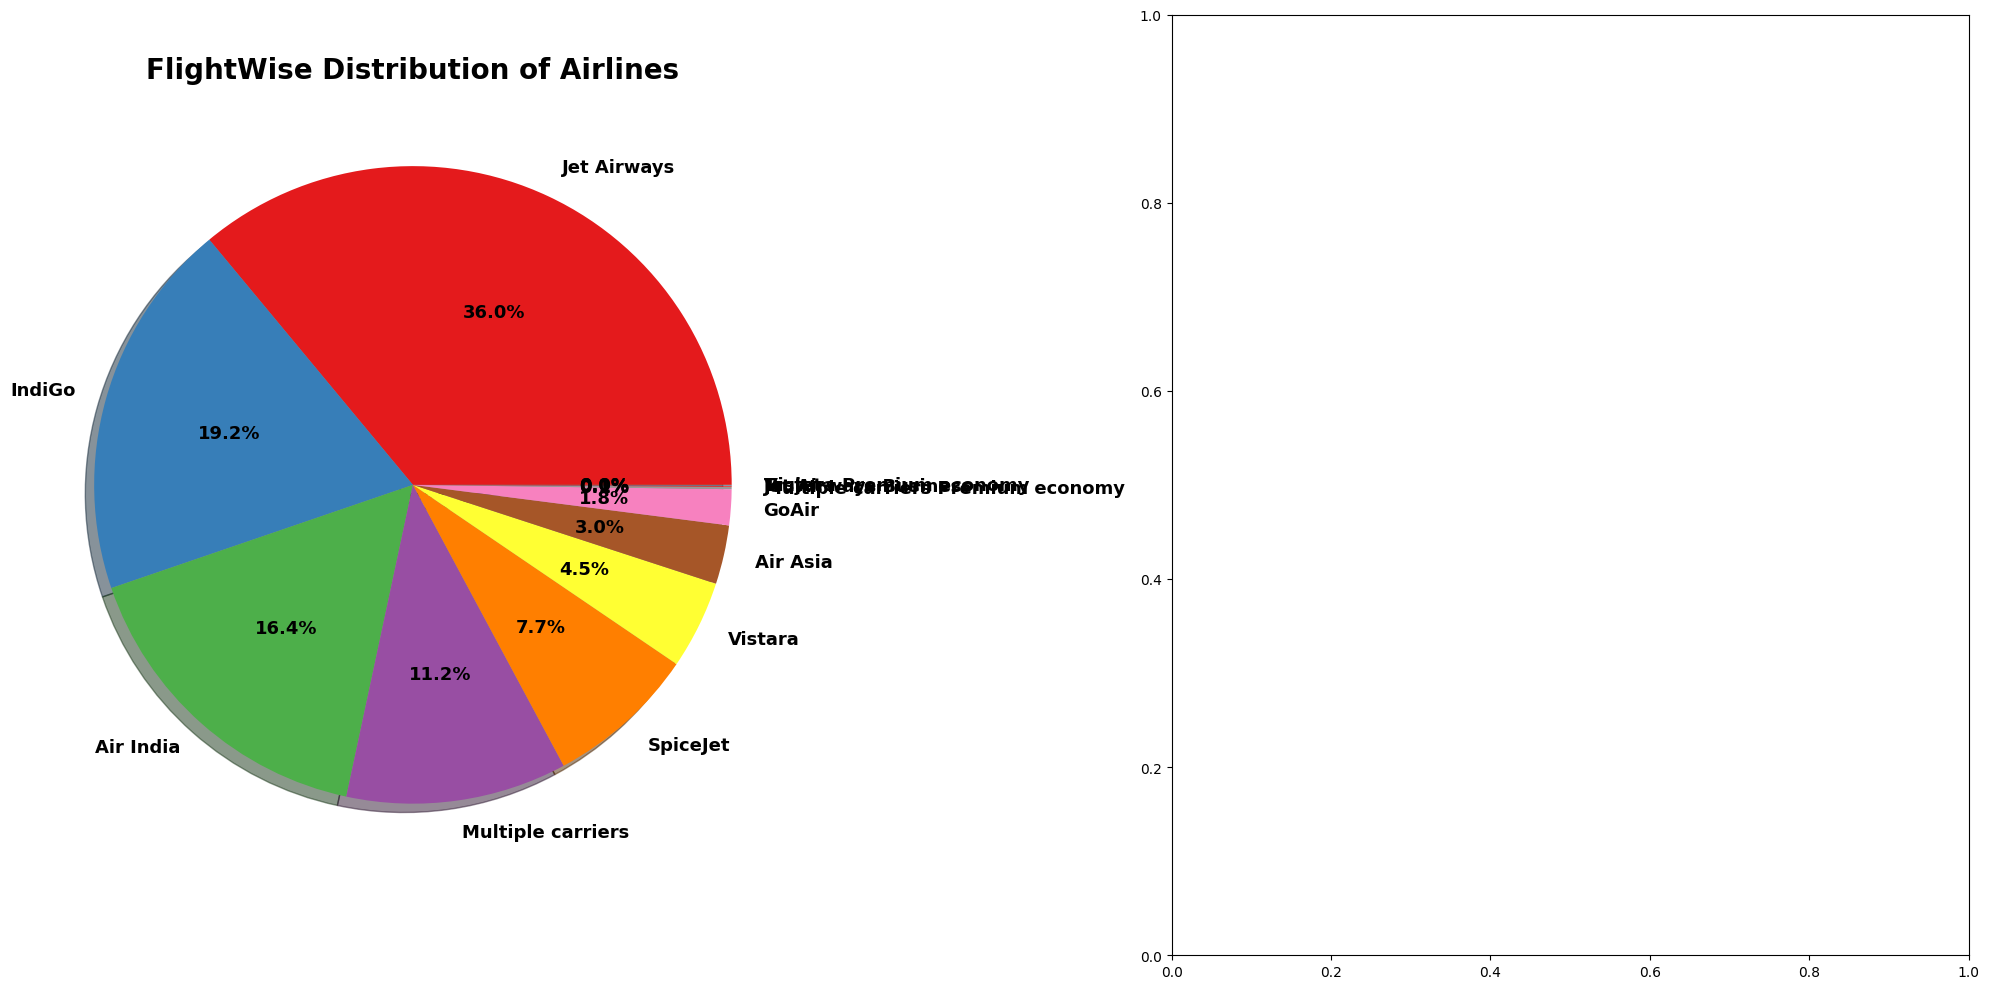

In [138]:
# Pie & count plot of Airline types
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
f,ax=plt.subplots(1,2,figsize=(20,10))
data['Airline'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13,'fontweight' :'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('FlightWise Distribution of Airlines', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Airline',data=data,ax=ax[1])
ax[1].set_title('Airline Vs No of Flights',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Airline",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Flights",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=12,rotation= 90)
plt.tight_layout()
plt.show()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

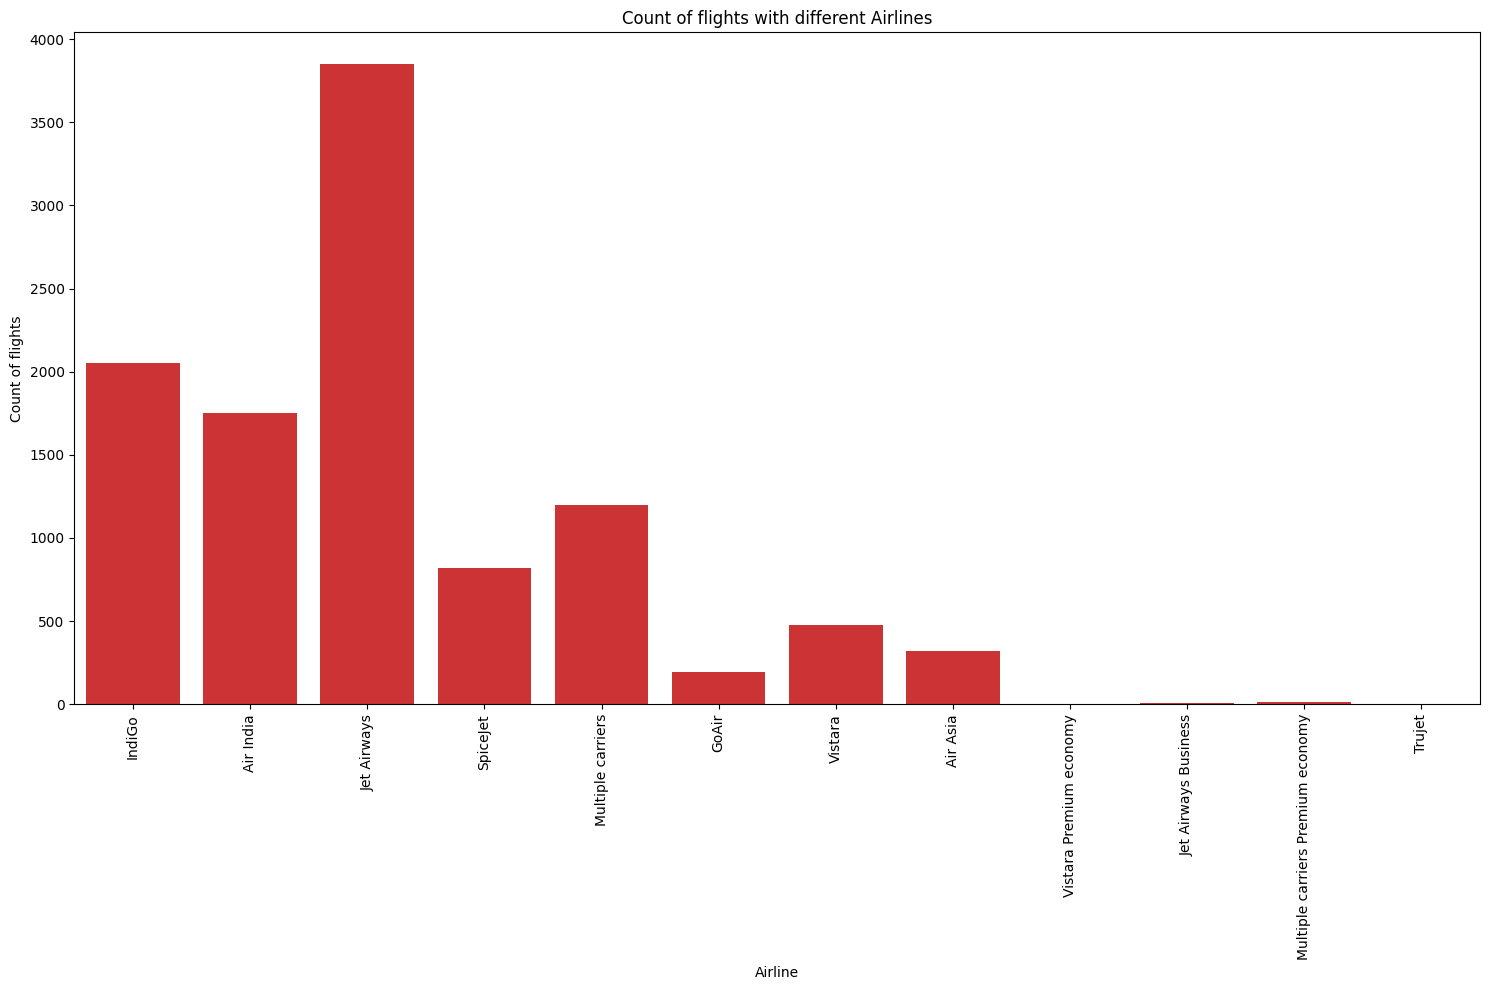

In [139]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =data)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)

observation:

       Jet airway has the maximum Airplane.

In [140]:
data.head(5)

Airline    Source Destination                  Route Total_Stops  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL      1 stop   

  Additional_Info  Price  Day_of_Journey  Month_of_Journey  Dep_hours  \
0         No info   3897              24                 3         22   
1         No info   7662               1                 5          5   
2         No info  13882               9                 6          9   
3         No info   6218              12                 5         18   
4         No info  13302               1                 3         16   

   Dep_minute  Arrival_hour  Arrival_minute  Duration_hours  Duratin_minutes  
0          20             1              10               2               50  
1          50            13              15               7               25  
2          25             4              25              19                0  
3           5            23              30               5               25  
4          50            21              35               4               45

In [141]:
# Airline is a Nominal Categorical Data we will do OneHotEncoding

airline=data[["Airline"]]
airline=pd.get_dummies(airline,drop_first=True)
airline.head()

Airline_Air India  Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0              False          False            True                False   
1               True          False           False                False   
2              False          False           False                 True   
3              False          False            True                False   
4              False          False            True                False   

   Airline_Jet Airways Business  Airline_Multiple carriers  \
0                         False                      False   
1                         False                      False   
2                         False                      False   
3                         False                      False   
4                         False                      False   

   Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0                                      False             False   
1                                      False             False   
2                                      False             False   
3                                      False             False   
4                                      False             False   

   Airline_Trujet  Airline_Vistara  Airline_Vistara Premium economy  
0           False            False                            False  
1           False            False                            False  
2           False            False                            False  
3           False            False                            False  
4           False            False                            False

## 2. Source

In [142]:
data.columns = data.columns.str.strip()


In [143]:
print(data.head())


       Airline    Source Destination                  Route Total_Stops  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL      1 stop   

  Additional_Info  Price  Day_of_Journey  Month_of_Journey  Dep_hours  \
0         No info   3897              24                 3         22   
1         No info   7662               1                 5          5   
2         No info  13882               9                 6          9   
3         No info   6218              12                 5         18   
4         No info  13302               1                 3         16   

   Dep_minute  Arrival_hour  Arrival_minute  Duration_hours  Duratin_minutes  
0          20             1    

In [144]:
data["Source"].value_counts()

Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [145]:
data.iplot(kind="box",x="Price",y="Source")

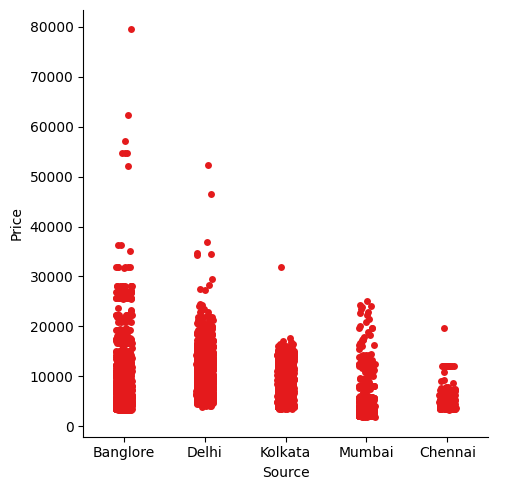

In [146]:
sns.catplot(y="Price",x="Source",data=data.sort_values("Price",ascending = False))

In [148]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Dep_hours', 'Dep_minute', 'Arrival_hour', 'Arrival_minute',
       'Duration_hours', 'Duratin_minutes'],
      dtype='object')

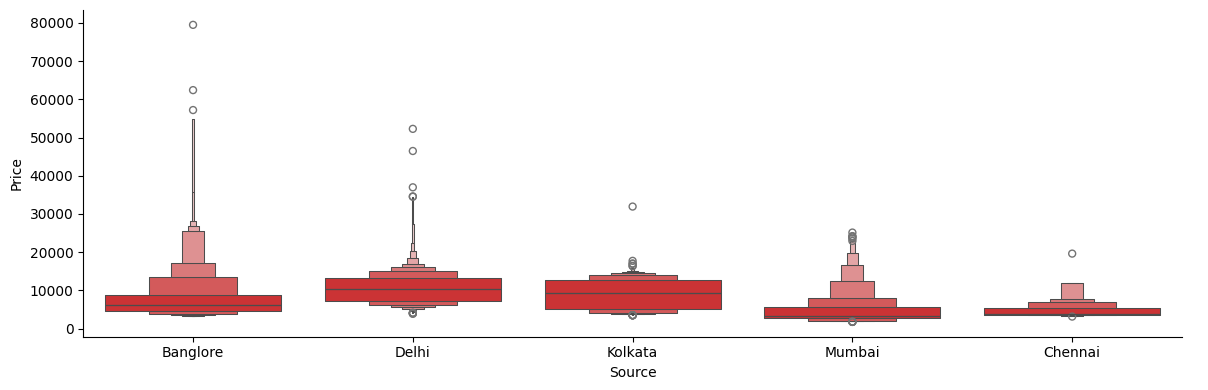

In [149]:
sns.catplot(y = "Price", x = "Source", data = data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [150]:
# as source Nominal Categorical data will performe Onehotencoding--

source=data[["Source"]]
source=pd.get_dummies(source,drop_first=True)
source.head()

Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai
0           False         False           False          False
1           False         False            True          False
2           False          True           False          False
3           False         False            True          False
4           False         False           False          False

## 3. Destination

In [151]:
print(data.columns)

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Dep_hours', 'Dep_minute', 'Arrival_hour', 'Arrival_minute',
       'Duration_hours', 'Duratin_minutes'],
      dtype='object')


In [152]:
data.columns = data.columns.str.strip()


In [153]:
data["Destination"].value_counts()


Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

<Axes: xlabel='Destination', ylabel='Price'>

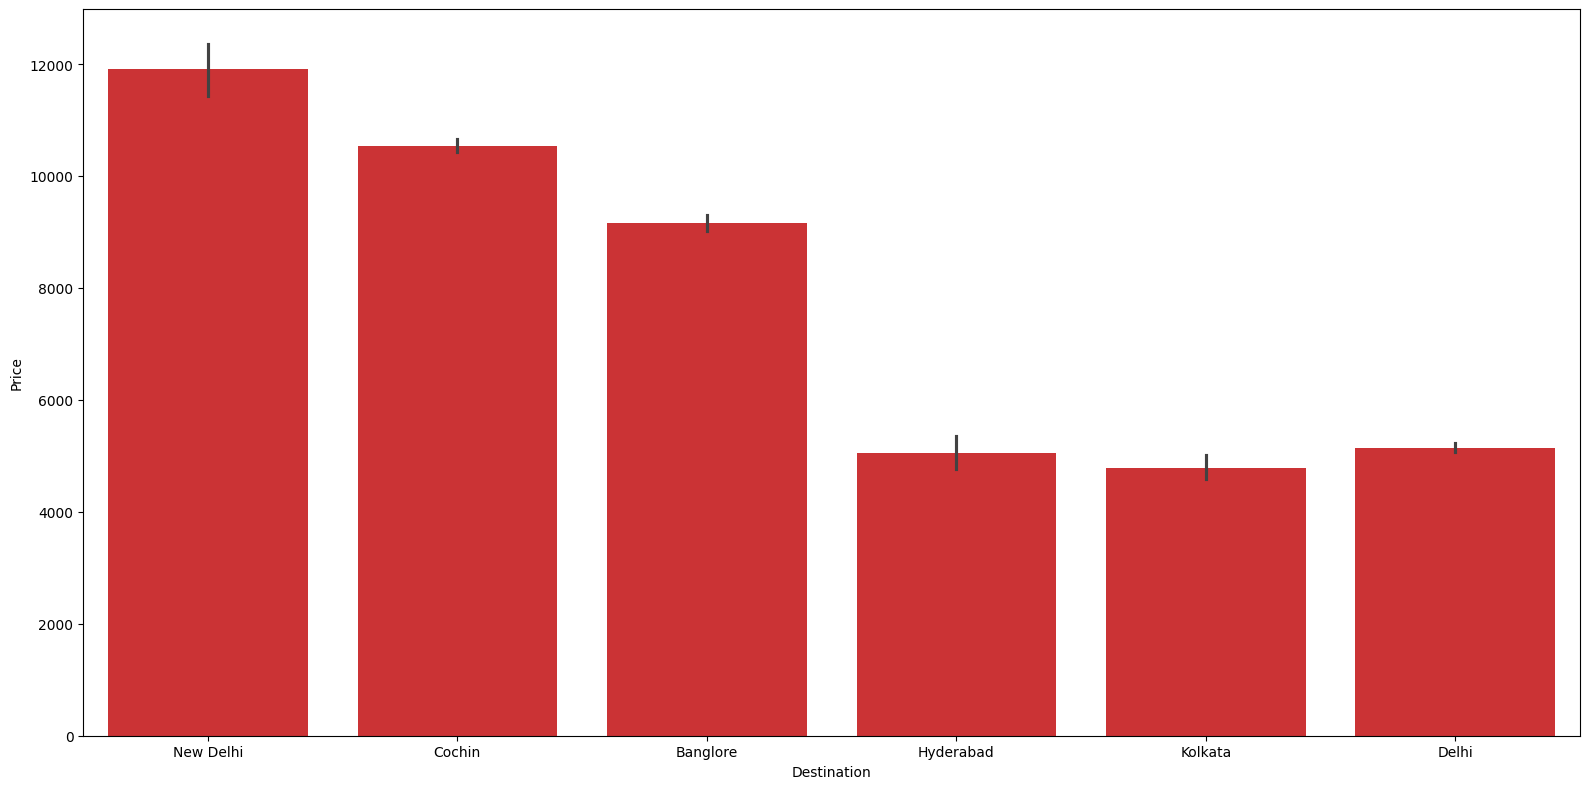

In [154]:
plt.figure(figsize=(16,8))
sns.barplot(x="Destination",y="Price",data=data.sort_values("Price",ascending=False))

<Figure size 1600x1200 with 0 Axes>

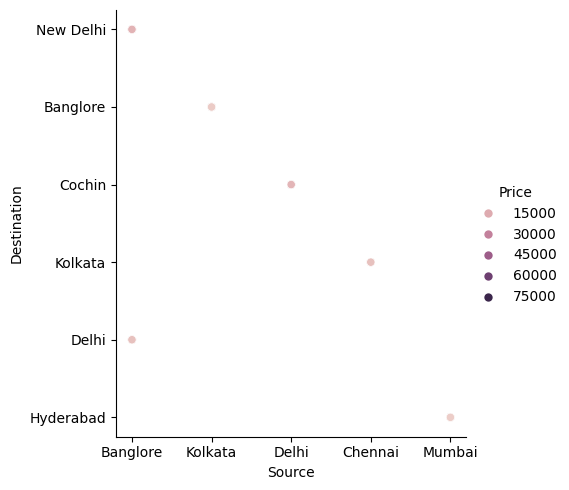

In [155]:
plt.figure(figsize=(16,12))
sns.relplot(x="Source",y="Destination",hue="Price",data=data)

In [156]:
# as destination is a Nominal Categorical data we will do OnehotEncoding

destination=data[["Destination"]]
destination=pd.get_dummies(destination,drop_first=True)
destination.head()

Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0               False              False                  False   
1               False              False                  False   
2                True              False                  False   
3               False              False                  False   
4               False              False                  False   

   Destination_Kolkata  Destination_New Delhi  
0                False                   True  
1                False                  False  
2                False                  False  
3                False                  False  
4                False                   True

Observation:

     1) The Highest Price is From Bangalore to New Delhi.
     2) The Lowest Price is From Mumbai to Hyderabad.

## 4. Duration Hours

<Axes: xlabel='Destination', ylabel='Duration_hours'>

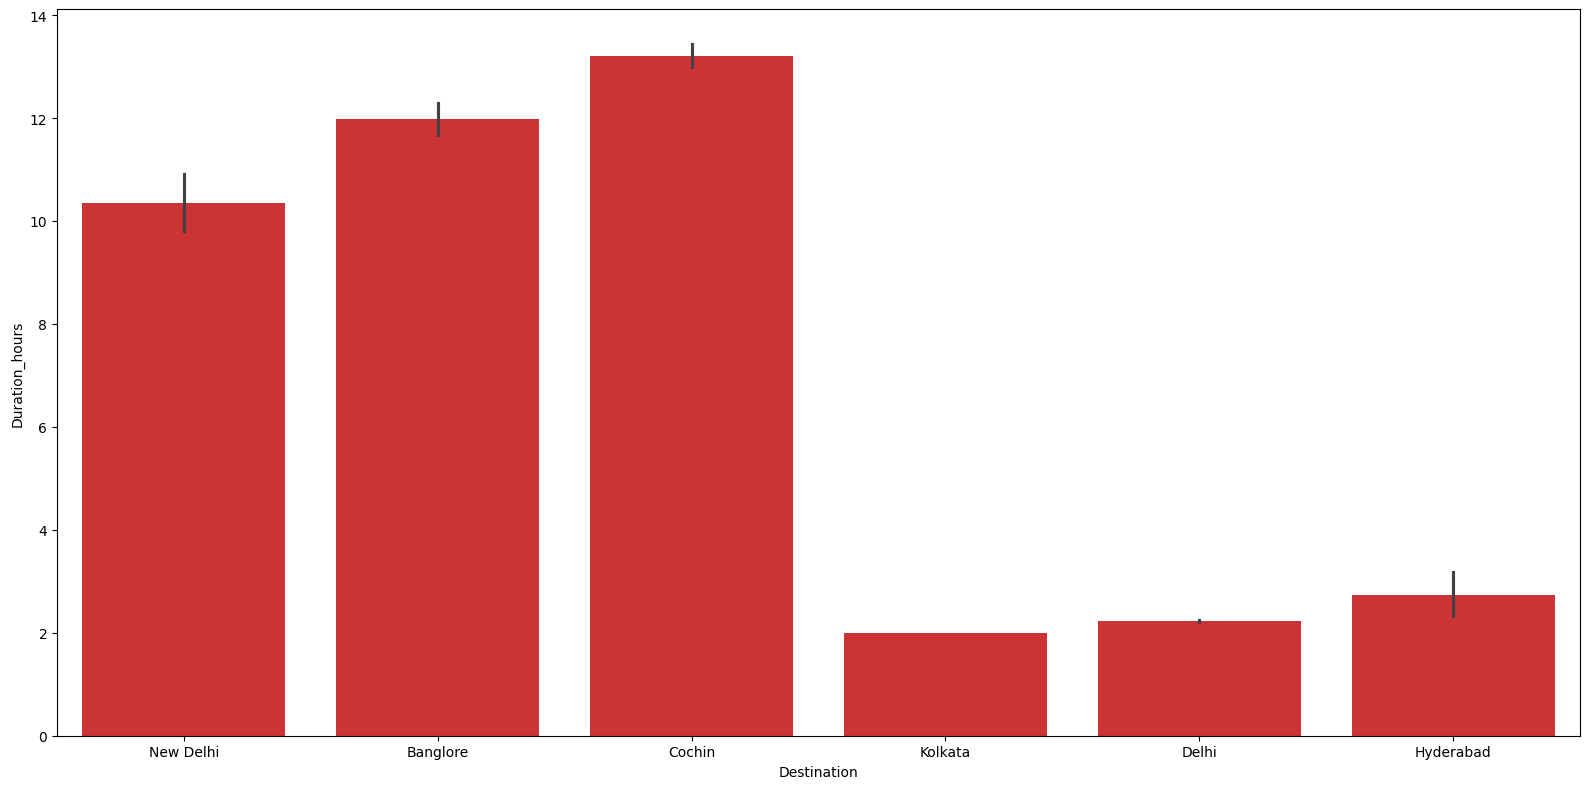

In [157]:
plt.figure(figsize=(16,8))
sns.barplot(x="Destination",y="Duration_hours",data=data)

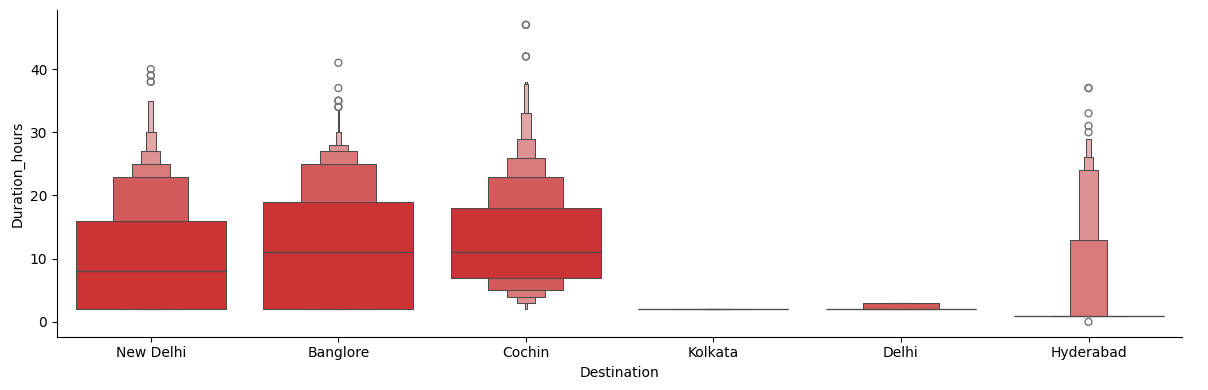

In [158]:
sns.catplot( x = "Destination",y = "Duration_hours", data = data, kind="boxen", height = 4, aspect = 3)
plt.show()

obsevation:

      1) Cochin is the destination which is taking higest no. of hours.

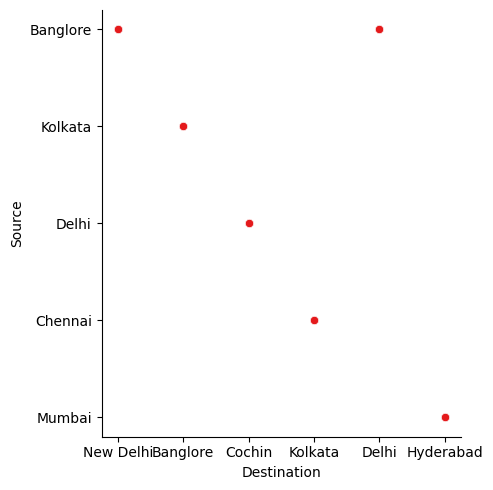

In [159]:
sns.relplot(x="Destination",y="Source",data=data)

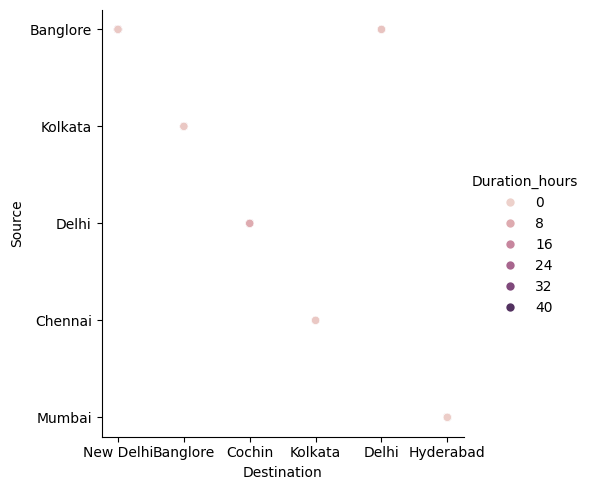

In [160]:
sns.relplot(x="Destination",y="Source",hue="Duration_hours",data=data)

Observation:

     1) New Delhi to Bangalore is the long distance of our travelling.
     2) After that Bangalore to Kolkata is second long distance.
     3) Hyderabad to Mumbai is the less distance that to cover.

## 5. Route & Additional Info

In [161]:
data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10683, dtype: object

In [162]:
data["Additional_Info"]

0        No info
1        No info
2        No info
3        No info
4        No info
          ...   
10678    No info
10679    No info
10680    No info
10681    No info
10682    No info
Name: Additional_Info, Length: 10683, dtype: object

In [163]:
data.drop(["Route","Additional_Info"],axis=1,inplace=True)

observation of Route and Additional Info:

     1) Additional Info has no information which would help us so, i had drop it.
     2) Route has no use in here so, i have drop it

## 6. Total Stops

In [164]:
data["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', 0.0, '4 stops'],
      dtype=object)

In [165]:
data["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
0.0            1
4 stops        1
Name: count, dtype: int64

In [166]:
# As Total Stop is case of Ordinal Categorical type we perform LabelEncoder and
# Here Values are assigned with corresponding keys --
data["Total_Stops"].replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4},inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_16532\4243082498.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Asus\AppData\Local\Temp\ipykernel_16532\4243082498.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [167]:
data["Total_Stops"].unique()

array([0., 2., 1., 3., 4.])

Observation:

    1) Might Total Stop is necessary so i am not droping it let it be .
    2) Its is a Ordinal Categorical Data so i have done do LabelEncoder so that model will understand easily.

What To do now:-

     1) We have done all necessary EDA.
     2) We have also done OneHotEncoding and LabelEncoding regarding Categorical Data.
     3) Now, we will concate all encodig data so that our model could understand easily.

## Concated Data :- Data + Airline + Source + Destination

In [168]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_new=pd.concat([data,airline,source,destination],axis=1)

In [169]:
data_new.head()

Airline    Source Destination  Total_Stops  Price  Day_of_Journey  \
0       IndiGo  Banglore   New Delhi          0.0   3897              24   
1    Air India   Kolkata    Banglore          2.0   7662               1   
2  Jet Airways     Delhi      Cochin          2.0  13882               9   
3       IndiGo   Kolkata    Banglore          1.0   6218              12   
4       IndiGo  Banglore   New Delhi          1.0  13302               1   

   Month_of_Journey  Dep_hours  Dep_minute  Arrival_hour  Arrival_minute  \
0                 3         22          20             1              10   
1                 5          5          50            13              15   
2                 6          9          25             4              25   
3                 5         18           5            23              30   
4                 3         16          50            21              35   

   Duration_hours  Duratin_minutes  Airline_Air India  Airline_GoAir  \
0               2               50              False          False   
1               7               25               True          False   
2              19                0              False          False   
3               5               25              False          False   
4               4               45              False          False   

   Airline_IndiGo  Airline_Jet Airways  Airline_Jet Airways Business  \
0            True                False                         False   
1           False                False                         False   
2           False                 True                         False   
3            True                False                         False   
4            True                False                         False   

   Airline_Multiple carriers  Airline_Multiple carriers Premium economy  \
0                      False                                      False   
1                      False                                      False   
2                      False                                      False   
3                      False                                      False   
4                      False                                      False   

   Airline_SpiceJet  Airline_Trujet  Airline_Vistara  \
0             False           False            False   
1             False           False            False   
2             False           False            False   
3             False           False            False   
4             False           False            False   

   Airline_Vistara Premium economy  Source_Chennai  Source_Delhi  \
0                            False           False         False   
1                            False           False         False   
2                            False           False          True   
3                            False           False         False   
4                            False           False         False   

   Source_Kolkata  Source_Mumbai  Destination_Cochin  Destination_Delhi  \
0           False          False               False              False   
1            True          False               False              False   
2           False          False                True              False   
3            True          False               False              False   
4           False          False               False              False   

   Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  
0                  False                False                   True  
1                  False                False                  False  
2                  False                False                  False  
3                  False                False                  False  
4                  False                False                   True

In [170]:
data_new.shape

(10683, 33)

In [171]:
data_new.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [172]:
data_new.head()

Total_Stops  Price  Day_of_Journey  Month_of_Journey  Dep_hours  \
0          0.0   3897              24                 3         22   
1          2.0   7662               1                 5          5   
2          2.0  13882               9                 6          9   
3          1.0   6218              12                 5         18   
4          1.0  13302               1                 3         16   

   Dep_minute  Arrival_hour  Arrival_minute  Duration_hours  Duratin_minutes  \
0          20             1              10               2               50   
1          50            13              15               7               25   
2          25             4              25              19                0   
3           5            23              30               5               25   
4          50            21              35               4               45   

   Airline_Air India  Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0              False          False            True                False   
1               True          False           False                False   
2              False          False           False                 True   
3              False          False            True                False   
4              False          False            True                False   

   Airline_Jet Airways Business  Airline_Multiple carriers  \
0                         False                      False   
1                         False                      False   
2                         False                      False   
3                         False                      False   
4                         False                      False   

   Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0                                      False             False   
1                                      False             False   
2                                      False             False   
3                                      False             False   
4                                      False             False   

   Airline_Trujet  Airline_Vistara  Airline_Vistara Premium economy  \
0           False            False                            False   
1           False            False                            False   
2           False            False                            False   
3           False            False                            False   
4           False            False                            False   

   Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  \
0           False         False           False          False   
1           False         False            True          False   
2           False          True           False          False   
3           False         False            True          False   
4           False         False           False          False   

   Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0               False              False                  False   
1               False              False                  False   
2                True              False                  False   
3               False              False                  False   
4               False              False                  False   

   Destination_Kolkata  Destination_New Delhi  
0                False                   True  
1                False                  False  
2                False                  False  
3                False                  False  
4                False                   True

# Feature Selection

Finding out the best feature which will contribute and have good relation with target variable.

In [173]:
data_new.shape

(10683, 30)

In [174]:
data_new.columns

Index(['Total_Stops', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Dep_hours', 'Dep_minute', 'Arrival_hour', 'Arrival_minute',
       'Duration_hours', 'Duratin_minutes', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [175]:
x=data_new.loc[:,['Total_Stops', 'Day_of_Journey', 'Month_of_Journey',
       'Dep_hours', 'Dep_minute', 'Arrival_hour', 'Arrival_minute',
       'Duration_hours', 'Duratin_minutes', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [176]:
x.head()

Total_Stops  Day_of_Journey  Month_of_Journey  Dep_hours  Dep_minute  \
0          0.0              24                 3         22          20   
1          2.0               1                 5          5          50   
2          2.0               9                 6          9          25   
3          1.0              12                 5         18           5   
4          1.0               1                 3         16          50   

   Arrival_hour  Arrival_minute  Duration_hours  Duratin_minutes  \
0             1              10               2               50   
1            13              15               7               25   
2             4              25              19                0   
3            23              30               5               25   
4            21              35               4               45   

   Airline_Air India  Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0              False          False            True                False   
1               True          False           False                False   
2              False          False           False                 True   
3              False          False            True                False   
4              False          False            True                False   

   Airline_Jet Airways Business  Airline_Multiple carriers  \
0                         False                      False   
1                         False                      False   
2                         False                      False   
3                         False                      False   
4                         False                      False   

   Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0                                      False             False   
1                                      False             False   
2                                      False             False   
3                                      False             False   
4                                      False             False   

   Airline_Trujet  Airline_Vistara  Airline_Vistara Premium economy  \
0           False            False                            False   
1           False            False                            False   
2           False            False                            False   
3           False            False                            False   
4           False            False                            False   

   Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  \
0           False         False           False          False   
1           False         False            True          False   
2           False          True           False          False   
3           False         False            True          False   
4           False         False           False          False   

   Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0               False              False                  False   
1               False              False                  False   
2                True              False                  False   
3               False              False                  False   
4               False              False                  False   

   Destination_Kolkata  Destination_New Delhi  
0                False                   True  
1                False                  False  
2                False                  False  
3                False                  False  
4                False                   True

In [177]:
y=data_new.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

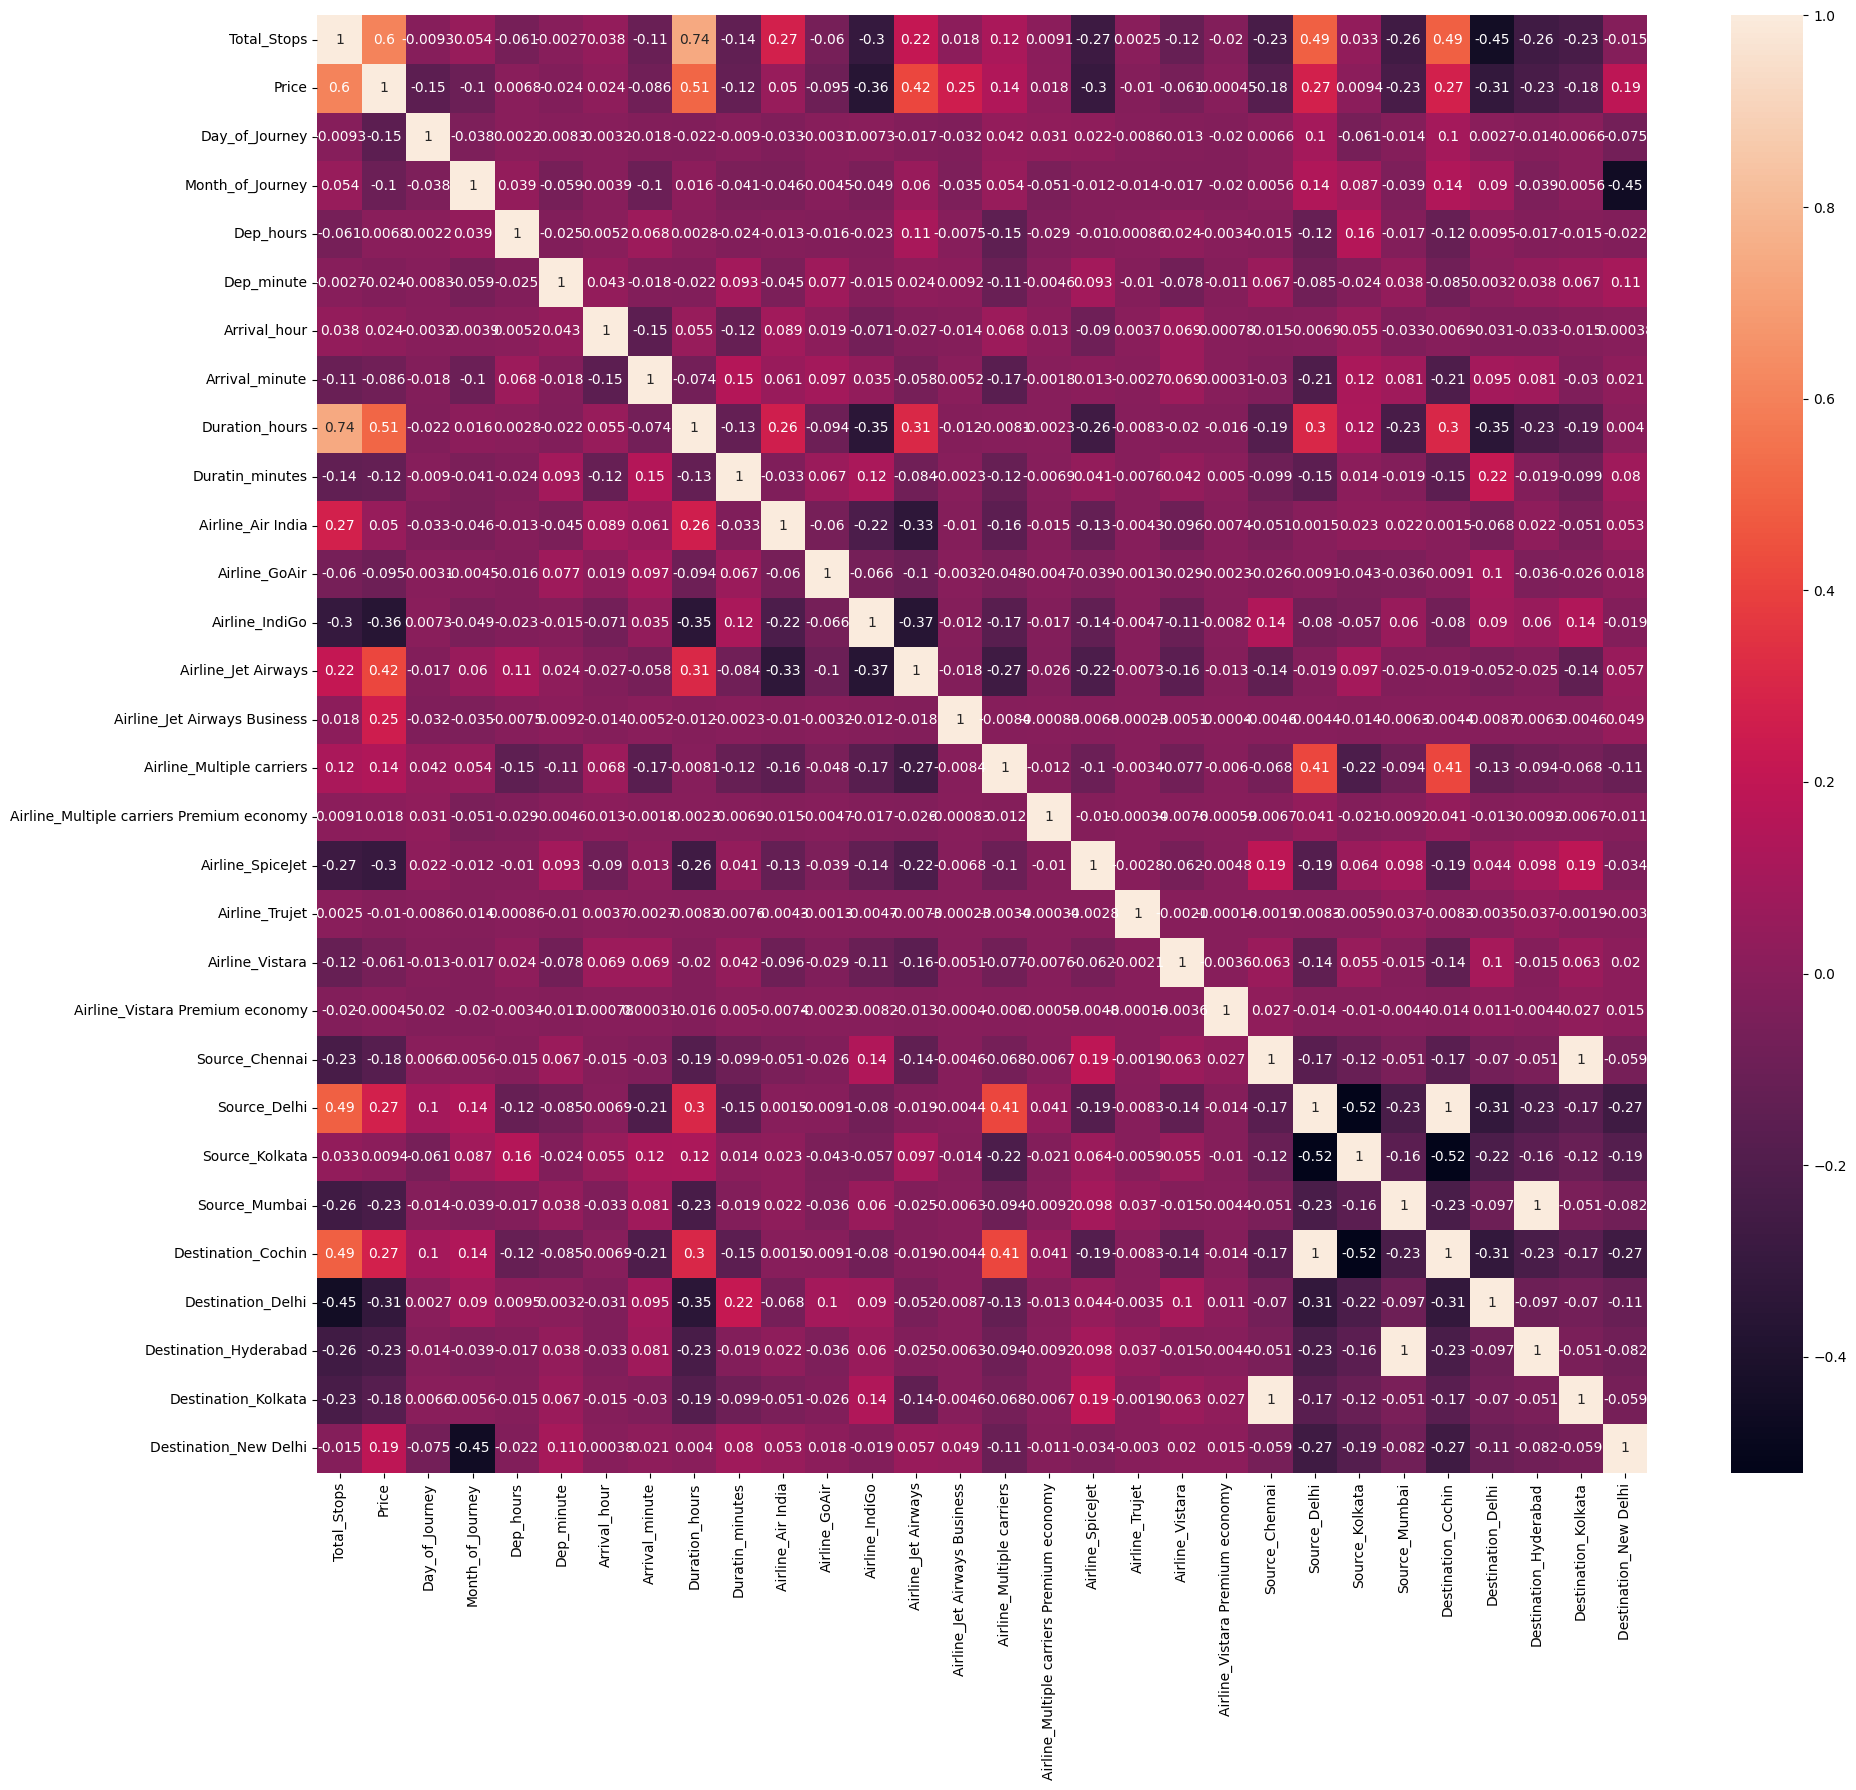

In [178]:
# Correlation between Independence and Dependence variable in Encoding Dataset:

plt.figure(figsize=(20,18))
sns.heatmap(data_new.corr(),annot=True)
plt.show()

In [179]:
# Finds correlation between Independent and dependent attributes in original dataset

plt.figure(figsize = (18,18))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

ValueError: could not convert string to float: 'IndiGo'

<Figure size 1800x1800 with 0 Axes>

Observation:


       we check correlation in both the dataset that is Encoding Dataset as well as in the Original Dataset and we find that there in such correlation among the indepence coulmns.

# Extra Tree Regression

ExtraTreesRegressor:- 
    
     1) It is a ensemble learning methods that uses in Decision Trees. The ExtraTree algorithm is like a the random forest algorithm, create many decision tree,but the sampling for each tree is random, without replacement.
     
     2) Extra Tree algo. does not performe bootstrap aggregation.In simple words,takes random subset of data without replacement.
     
     3) The main advantages of Extra Tree is the reduction of bias.

In [180]:
from sklearn.ensemble import ExtraTreesRegressor
extra_tree_model=ExtraTreesRegressor(n_estimators=5,criterion='squared_error')
extra_tree_model.fit(x,y)

ExtraTreesRegressor(n_estimators=5)

In [181]:
extra_tree_model.feature_importances_

array([2.60123238e-01, 1.43673971e-01, 5.27342346e-02, 2.49731562e-02,
       2.08376604e-02, 2.51914703e-02, 2.29563987e-02, 2.92009100e-02,
       1.87576829e-02, 1.98260352e-02, 1.78477186e-03, 1.62467545e-02,
       1.59430176e-01, 6.84728638e-02, 1.97602801e-02, 1.16243561e-03,
       2.77500610e-03, 1.75265867e-04, 5.54903295e-03, 6.06107368e-05,
       9.98171176e-04, 1.62779823e-02, 2.73499709e-03, 1.92457396e-02,
       1.70259469e-02, 2.17479131e-02, 3.62630951e-03, 3.65816204e-04,
       2.42851687e-02])

In [182]:
extra_tree_feature=pd.Series(extra_tree_model.feature_importances_,index=x.columns)
extra_tree_feature

Total_Stops                                  0.260123
Day_of_Journey                               0.143674
Month_of_Journey                             0.052734
Dep_hours                                    0.024973
Dep_minute                                   0.020838
Arrival_hour                                 0.025191
Arrival_minute                               0.022956
Duration_hours                               0.029201
Duratin_minutes                              0.018758
Airline_Air India                            0.019826
Airline_GoAir                                0.001785
Airline_IndiGo                               0.016247
Airline_Jet Airways                          0.159430
Airline_Jet Airways Business                 0.068473
Airline_Multiple carriers                    0.019760
Airline_Multiple carriers Premium economy    0.001162
Airline_SpiceJet                             0.002775
Airline_Trujet                               0.000175
Airline_Vistara             

<Axes: >

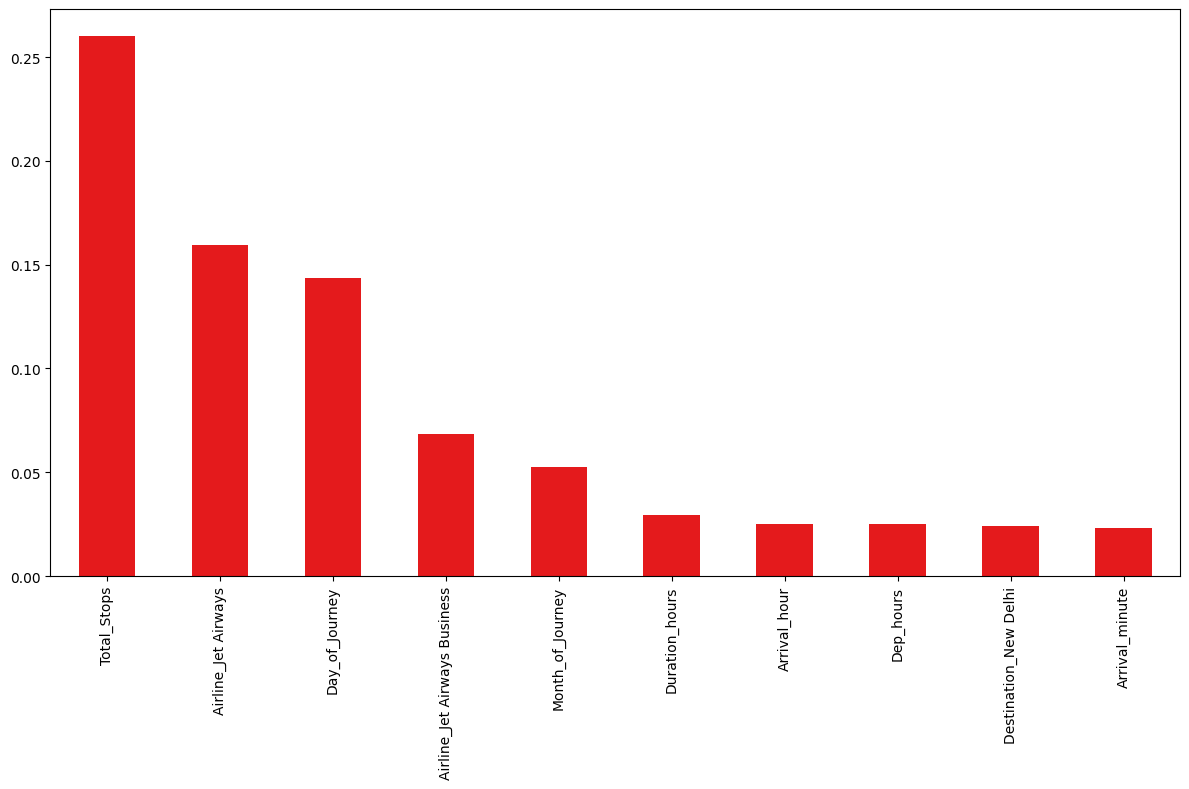

In [183]:
plt.figure(figsize=(12,8))
extra_tree_feature.nlargest(10).plot(kind='bar')

Observation:

    1) From The ExtraTreeRegression we find our top 10 feature for the model building or best for our output feature.
    
    2) But we are not sure that wheater we should take only this feature because after doing labelEncoding we have 33 feature and out of that it will be very difficult to choose only 10 features. 
    
    

# Random Forest

    1) Split dataset into train and test set in order to prediction X_test
    2) If needed do scaling of data:-
              Scaling is not done in Random forest
    3) Fit the data
    4) Predict X_test
    5) In regression check RSME Score
    6) Plot graph

In [184]:
# Train-test-split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=150)

In [185]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model=RandomForestRegressor(n_estimators=99,criterion='squared_error',bootstrap=True,verbose=1)
random_forest_model.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.7s


RandomForestRegressor(n_estimators=99, verbose=1)

In [186]:
y_pred=random_forest_model.predict(x_test)
y_pred

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


array([15166.12121212,  3916.60606061,  9476.75757576, ...,
        4298.48484848, 12848.56565657,  3564.84680135])

In [187]:
random_forest_model.score(x_train,y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


0.9535603621822664

In [188]:
random_forest_model.score(x_test,y_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


0.8281882103410544

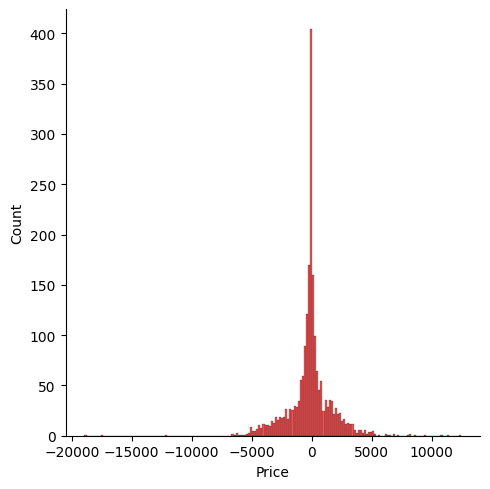

In [189]:
sns.displot(y_test-y_pred)
plt.show()

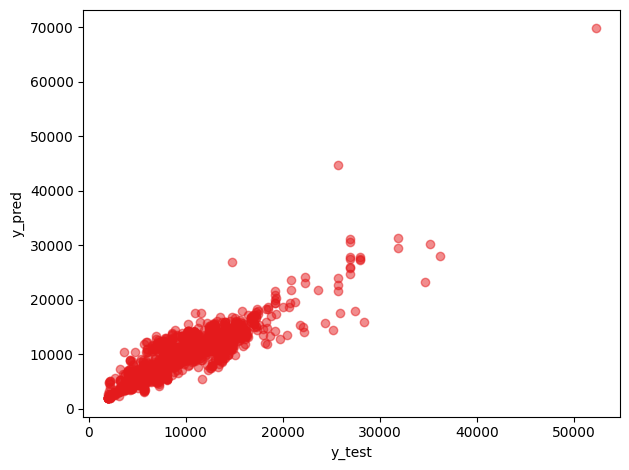

In [190]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [191]:
from sklearn import metrics

In [192]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1178.7669033276177
MSE: 3732589.5572939557
RMSE: 1931.9910862356369


In [193]:
metrics.r2_score(y_test,y_pred)

0.8281882103410544

Observation:

     1) In Random Forest we get Train score nearly about 95% and test score 75% which is kind of Overfitting.
     2) We get R2 83%.
     3) We will do HyperParemeter Tuning.

# HyperParameter Tuning

    1) Choose following method for hyperparameter tuning
          1.1) RandomizedSearchCV --> Fast
          1.2) GridSearchCV
   
    2) Assign hyperparameters in form of dictionery
    3) Fit the model
    4) Check best paramters and best score

## 1. RandomSearchCV

In [194]:
from sklearn.model_selection import RandomizedSearchCV

In [195]:
random_pram={
    'n_estimators':[20,60,100,120],
    'max_features':[0.2,0.4,0.6,1.0],
    'max_depth':[2,8,None],
    'max_samples':[0.5,0.75,1.0],
    'bootstrap':[True,False],
    'min_samples_split':[2,5],
    'min_samples_leaf':[1,2]

}

In [196]:
random_search_cv=RandomizedSearchCV(estimator=random_forest_model,param_distributions=random_pram,
                   cv=5,verbose=2,n_jobs=-1)

In [197]:
random_search_cv

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=99, verbose=1),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.4, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [20, 60, 100, 120]},
                   verbose=2)

In [198]:
random_search_cv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\Asus\Desktop\Flight\vab\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning:


45 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Asus\Desktop\Flight\vab\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Asus\Desktop\Flight\vab\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Asus\Desktop\Flight\vab\Lib\site-packages\sklearn\ensemble\_forest.py", line 

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=99, verbose=1),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.4, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [20, 60, 100, 120]},
                   verbose=2)

In [199]:
random_search_cv.best_params_

{'n_estimators': 120,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_samples': 0.5,
 'max_features': 0.4,
 'max_depth': 8,
 'bootstrap': True}

In [200]:
random_search_cv.best_score_

0.7388073415662811

In [201]:
random_searchCV_model=RandomForestRegressor(n_estimators=60,min_samples_split=5,min_samples_leaf=2,
                                           max_samples=0.5,max_features=0.4,
                                           max_depth=8,bootstrap=True)

In [202]:
random_searchCV_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=8, max_features=0.4, max_samples=0.5,
                      min_samples_leaf=2, min_samples_split=5, n_estimators=60)

In [203]:
y_pred_randomCV=random_searchCV_model.predict(x_test)
y_pred_randomCV

array([13564.14615034,  4036.5784945 ,  9503.84129715, ...,
        4348.30948541, 10115.35000026,  4490.89041823])

In [204]:
random_searchCV_model.score(x_test,y_test)

0.7924770773014151

In [205]:
random_searchCV_model.score(x_train,y_train)

0.7809585548614218

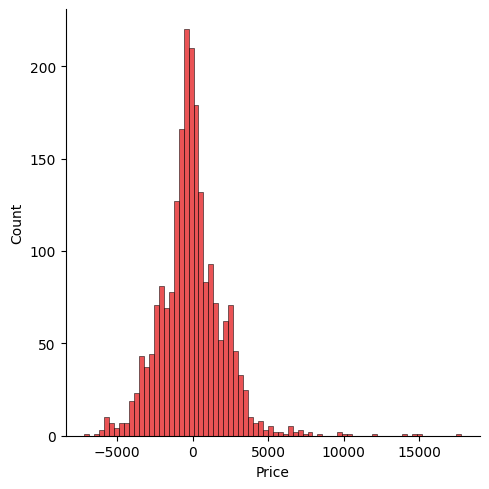

In [206]:
sns.displot(y_test-y_pred_randomCV)

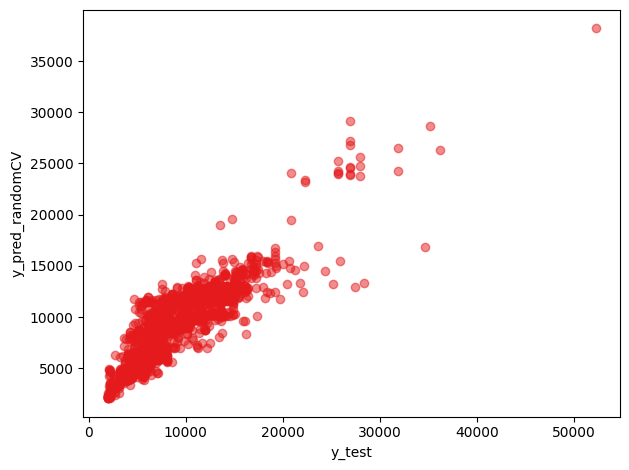

In [207]:
plt.scatter(y_test, y_pred_randomCV, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred_randomCV")
plt.show()

In [208]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred_randomCV))
print("MSE:",metrics.mean_squared_error(y_test,y_pred_randomCV))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred_randomCV)))

MAE: 1503.7603162932278
MSE: 4508409.438615777
RMSE: 2123.3015420838788


In [209]:
metrics.r2_score(y_test,y_pred_randomCV)

0.7924770773014151

Observation:

       1) In Hyperparameter with RandomSearchCv we get Train score 78% and Testing Score also 78% with is very good.
       2) The R2 Score of the model is also 78%.

## 2. GridSearch CV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_pram={
    "n_estimators":range(1,100,1),
    "criterion":["squared_error", "absolute_error", "friedman_mse", "poisson"],
    "max_depth":range(2,30,1),
    'min_samples_split':[1,4,6,10],
    "max_features" : ["sqrt", "log2", None],
    "bootstrap":[True,False],
    "verbose":[1]
  #  ccp_alpha:np.random.ran(20)
}

# Note : ccp_alpha is very important but i have very low processor and it will take very very mucg time so i am not taking it

In [ ]:
grid_searchcv_model=GridSearchCV(estimator=random_forest_model,param_grid=grid_pram,cv=10,n_jobs=-1)
grid_searchcv_model

GridSearchCV(cv=10, estimator=RandomForestRegressor(n_estimators=99, verbose=1),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': range(2, 30),
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_split': [1, 4, 6, 10],
                         'n_estimators': range(1, 100), 'verbose': [1]})

In [ ]:
grid_searchcv_model.fit(x_train,y_train)

c:\Users\Asus\Desktop\Flight\vab\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


OSError: [Errno 22] Invalid argument

Note:
       
       GridSearch CV is taking very much time and i have a very low Processor so, it will be very difficult for 
       me to do Hyperparameter Tuning with GridSearch CV.

# Save The model

In [ ]:
import pickle
file=open('flight_price_model.pkl','wb')
pickle.dump(random_searchCV_model,file)

Observation:

      1) Saving the RandomForest Hyper-parameter tuning model.
      2) Now i will make a app.py of this model in VScode or in PYcharm so that it will easy to use.
      3) After that i will find a free deployment cloud serve to deploy the model.